In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import math

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".3"})

In [8]:
%matplotlib inline

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
from sklearn import metrics

In [12]:
import statsmodels.api as sm   # The dataset

## Supervised Learning: Logistic Regression

This project uses Redbook Magazine data for practicing supervised learning with logistic regression. 

The data being used was self-reported data, so the accuracy should be taken with a grain of salt. It came from a 1974 Redbook Magazine survey where married women were asked if they had had extramarital affairs. The published work on the data set can be found in [the Journal of Political Economy](http://fairmodel.econ.yale.edu/rayfair/pdf/1978A200.PDF). 

With logistic regression, it is possible to take a derivative of a function and see how it works with various training samples; that could be done with more than two classes. But since this is a completely first try at working with logistic regression, binary classification is a much better/easier starting point. So, in this project, the logistic function/Sigmoid function will be used on an imported statsmodels dataset that contains the survey results, and a binary classification of the data will be carried out.

Since it will be treated as a classification problem, the question asked will be whether it is possible to use certain variable data to classify the respondents by infidelity?



***

To start, the data will be loaded. To do that, a DataFrame object named "dataFr" will be made and "sm" (for the statsmodels api) will be called, ".datasets", ".fair" (which stands for the affairs). Calling "load_pandas.data()" is the way, in the statsmodels module, to load their built-in datasets into a Pandas DataFrame (it’s very specific to the statsmodels module). 


In [13]:
dataFr = sm.datasets.fair.load_pandas().data

In [14]:
dataFr[0:1]  

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111


Soon, a new column named “had_affair” will be created to help start the classification process. The column will be set equal to 0 if the affairs column is 0 (which indicates that the woman had never had an affair). Or, the column will be set to 1 (meaning she did, indeed, spend some time in an affair).

To do this, a function named “affairYN” will be applied onto the DataFrame. “affairYN” will take in an input “x”. If “x” is not equal to 0, 1 will be returned else, return 0. 


In [21]:
def affairYN(x):
    if x != 0:
        return 1
    else:
        return 0

Next, that aforementioned a new column will be created in the DataFrame to serve the purpose of relaying the binary information of whether or not the respondent had had an affair. The function that was just created checks for a yes or a no within a column. So, by applying that “affairsYN” function onto the “affairs” column, that respondent’s fidelity status can be checked. 

What will happen below will be the creation of the new column (“had_affair”) which will return either a 0 (no affair) or a 1 (yes affair). In order for it to do that, the “had_affair” column will be set equal to the “affairs” column with the function that checks for an affair (“affairYN”) applied to it.


In [22]:
dataFr["had_affair"] = dataFr["affairs"].apply(affairYN)

In [23]:
dataFr  # Checking for the new column

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


Below, every data row in the new “had_affair” column will be grouped by whether or not the participant had had an affair (0 or 1). Then, using an aggregate function, the mean of every value/row in that particular group will be taken.

In [24]:
dataFr.groupby("had_affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In taking a look at the data above, it seems like the respondents who reported having had affairs were slightly older and also it looks like they had been married for a little longer. However, the mean value for both of those cases are really close for most of the variables, so it is hard to say anything for certain yet. 

-----


Below the data will be visualized via a factorplot of the “age” using Seaborn. The data will be set to the DataFrame “dataFr”. By using the “had_affair” column as a hue, the Seaborn factorplot will show something similar to a groupby for whether or not respondents had had an affair.


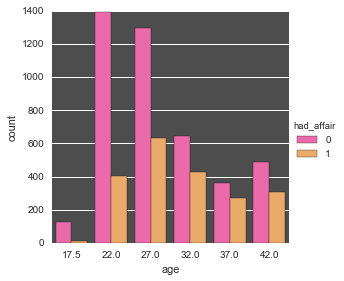

In [26]:
sns.factorplot("age", data = dataFr, hue = "had_affair", palette = "spring", kind = "count")

The above visualization gives the impression that differences start to even out as the ages of the participants increased.

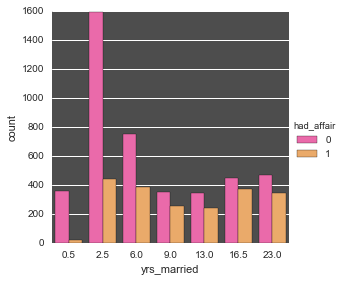

In [28]:
sns.factorplot("yrs_married", data = dataFr, hue = "had_affair", palette = "spring", kind = "count")

It looks like, with this dataset, the probability of having an affair increased slightly with the number of years married.

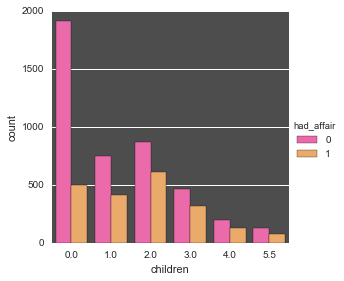

In [27]:
sns.factorplot("children", data = dataFr, hue = "had_affair", palette = "spring", kind = "count")

It looks like, as the number of children increased, the likelihood of an affair amongst the respondents increased as well. And it looks like the respondents who had no children were less likely to have had an affair.  

---



Since two of the columns contain categorical/nominal variables (Occupation and Husband’s Occupation), dummy variables will need to be generated so that the data can be used within the regression model. Pandas has a built-in method for building columns from dummy variables that it generates. That will be used next, starting first by creating new DataFrames for each of the categorical variables, then using Pandas to generate dummy variables.

In [29]:
occDummies = pd.get_dummies(dataFr["occupation"])

In [30]:
occHusDummies = pd.get_dummies(dataFr["occupation_husb"])

Next, for clarity, more descriptive column names will be create for the new DataFrames.

In [19]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
occDummies.columns = ["wife_group1", "wife_group2", "wife_group3", "wife_group4", "wife_group5", "wife_group6"]

In [37]:
occDummies[0:1]  # Checking the result.

,wife_group1,wife_group2,wife_group3,wife_group4,wife_group5,wife_group6
0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
occHusDummies.columns = ["hus_group1", "hus_group2", "hus_group3", "hus_group4", "hus_group5", "hus_group6"]

In [38]:
occHusDummies[0:1]   # Checking the result.

,hus_group1,hus_group2,hus_group3,hus_group4,hus_group5,hus_group6
0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
X = dataFr.drop(["occupation", "occupation_husb", "had_affair"], axis = 1)

Next, the two dummy DataFrames will be concatenated together.

In [34]:
dummies = pd.concat([occDummies, occHusDummies], axis = 1)

Next, the X DataFrame and the dummies DataFrame will be concatenated in order to split up the occupations using dummy variables.

In [35]:
X = pd.concat([X, dummies], axis = 1)

In [36]:
dummies.head()  # Checking the concatenation

,wife_group1,wife_group2,wife_group3,wife_group4,wife_group5,wife_group6,hus_group1,hus_group2,hus_group3,hus_group4,hus_group5,hus_group6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Below, the Y (the target class) will be set.

In [39]:
Y = dataFr.had_affair

In [40]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [41]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: had_affair, dtype: int64

In [42]:
X = X.drop("affairs", axis = 1)

In [43]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,wife_group1,wife_group2,wife_group3,wife_group4,wife_group5,wife_group6,hus_group1,hus_group2,hus_group3,hus_group4,hus_group5,hus_group6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Since dummy variables were used as a part of the data preparation process, the issue of multicollinearity will need to be considered. Each wife can only "belong" to one occupation in the group and the case is the same for each husband. That situation means that individual occupations can be linearly predicted from all of the others. Also, the affairs column is essentially a repeat of the Y target, so it is data that also can serve to contribute to multicollinearity. Sacrificing data points is one way to tackle these issues. Below, to help avoid multicollinearity, the first column that relates to occupations for both spouses will be dropped as well as the “affairs” column.


In [44]:
X = X.drop("wife_group1", axis = 1) 

In [45]:
X = X.drop("hus_group1", axis = 1) 

In [48]:
X[0:1]   # Checking...

,rate_marriage,age,yrs_married,children,religious,educ,wife_group2,wife_group3,wife_group4,wife_group5,wife_group6,hus_group2,hus_group3,hus_group4,hus_group5,hus_group6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
Y.head()   

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

The Y (target) that was created will need to be flatted (i.e. - turned into a 1D array) in order to be used with scikit-learn.  Numpy’s ravel method will be used below to do that. 

In [49]:
Y = np.ravel(Y)

In [50]:
Y

array([1, 1, 1, ..., 0, 0, 0])

Next, scikit-learn will be used to run the logistic regression. A model will be created, the data will be fit into the model, the accuracy score will be checked, then the data will be split into training and testing sets. The model will be initiated to start. That will be done by creating a logistic regression object called logModel. 


In [51]:
logModel = LogisticRegression()

Next, the data will be fit by calling the fit method.

In [52]:
logModel.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Next, a check for accuracy with the score method.

In [53]:
logModel.score(X,Y)

0.72588752748978946

Next, the null error rate (mean of Y) will be looked at to be able to compare the accuracy results to the original Y data.

In [54]:
Y.mean()

0.32249450204209867

The model returned a 73% accuracy rating for predicting which respondents did and which respondents did not have an affair. 

The Y mean (null error rate) shows that, if the model merely guessed that the women had no affair for each entry, there would be an accuracy of 68% (1 - 0.32 = 0.68). The model having a 73% accuracy rate is slightly better than the null error rate.

Below, the coefficients of the model will be checked to get an idea of which factors may be the stronger predictors.


In [62]:
coefFrame = DataFrame(list(zip(X.columns, np.transpose(logModel.coef_))))  
#"DataFrame(dict(zip(X.columns,np.transpose(log_model.coef_))))" would work also, but the return would be horizontal.

In [63]:
coefFrame  # Checking....

,0,1
0,rate_marriage,[-0.697565216061]
1,age,[-0.0561986273109]
2,yrs_married,[0.103712270254]
3,children,[0.0183780286992]
4,religious,[-0.368253220283]
5,educ,[0.0088996639776]
6,wife_group2,[0.293296223012]
7,wife_group3,[0.602720792503]
8,wife_group4,[0.340002398077]
9,wife_group5,[0.937822609447]


Above, the coefficient with the highest absolute value not in a nominal category is the one that relates to marriage satisfaction. So it seems that an increased marriage rating corresponded to a decrease in the likelihood of having had an affair (which makes sense). The interpretation here is that, if the respondent reported having a good marriage, the likelihood of having had an affair decreased. And it also looks like increased religiousness seemed to correspond to a decrease in the likelihood of having had an affair. 

---


Below, scikit-learn’s built-in train_test_split method will be used to create a training set and a testing set for both the X’s and the Y’s (so, all of the data and then the target classes). 

To do that, the data will first be split into four objects that will be set to train_test_split() with both the Y target and the X data points passed through it.

In [64]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)

Next, a new logistic regression model named "logModel2" will be created below.

In [65]:
logModel2 = LogisticRegression()

Below, the “logModel2” model will be fit using only the training datasets.

In [66]:
logModel2.fit(XTrain, YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Below, a logistic regression object named “classPredict” (shortened from "classification prediction") will be created and set equal to logModel2.predict. As its name suggests, it will be used for help with predicting classification labels for the X testing set (XTest).


In [67]:
classPredict = logModel2.predict(XTest)

Below, the predicted classes will be compared to the actual test classes (i.e. - a comparison of the “YTest” to the “classPredict”) for reevaluating the accuracy score. In order to do this, scikit-learn’s metrics library will be used and the accuracy_score method will be called and the results will be printed.


In [68]:
print (metrics.accuracy_score(YTest, classPredict))

0.72675879397


At 0.726, this accuracy score is very close to the original result from before.